In [1]:
# import the dependencies
import os
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define download path and destination directories
DOWNLOAD_ROOT = "ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/"

GHCN_FILES = {
    'version': "ghcnd-version.txt",
    'stations': "ghcnd-stations.txt",
    'inventory': "ghcnd-inventory.txt",
    'countries': "ghcnd-countries.txt",
    'states': "ghcnd-states.txt"}

DESTINATION_PATH = os.path.join("static", "src")
CSV_PATH = os.path.join("static", "data", "csv")
IMG_PATH = os.path.join("static", "img")

In [3]:
# Write a helper function to download the files

def fetch_ghcn_files(download_root=DOWNLOAD_ROOT, ghcn_files=GHCN_FILES, destination_path=DESTINATION_PATH):
    if not os.path.isdir(destination_path):
        os.makedirs(destination_path)
    for key, file in ghcn_files.items():
        download_file = os.path.join(download_root, file)
        destination_file = os.path.join(destination_path, file)
        try:
            print(f"Downloading {file}")
            urllib.request.urlretrieve(download_file, destination_file)
        except Exception as e:
            print(e)
            print(f"Failed to download the file: {file}")

In [4]:
# download the required files
fetch_ghcn_files()

In [9]:
# Write a helper function to load the files and convert to .csv formats

def load_ghcn_file(file_name, file_colspecs, file_colnames,\
              src_path=DESTINATION_PATH, csv_path=CSV_PATH):
    if not os.path.isdir(csv_path):
        os.makedirs(csv_path)
    file_path = os.path.join(src_path, file_name)
    df = pd.read_fwf(file_path, colspecs=file_colspecs, names=file_colnames)
    
    file_name_root = file_name.split('.')[0]
    csv_file_name = file_name_root + ".csv"
    csv_file_path = os.path.join(csv_path, csv_file_name)
    
    df.to_csv(csv_file_path, index=False)
    return df

def load_stations():
    stations_colspecs = [(0,12),(12,21),(21,31),(31,38),(38,41),(41,72),(72,76),(76,80),(80,86)]
    stations_colnames = ["station_id", "latitude", "longitude", "elevation", "state", "name",\
                         "gsn_flag", "hcn_crn_flag", "wmo_id"]
    stations_filename = GHCN_FILES['stations']
    return load_ghcn_file(stations_filename, stations_colspecs, stations_colnames)

def load_countries():
    countries_colspecs = [(0, 3), (3, 50)]
    countries_colnames = ['fips', 'name']
    countries_filename = GHCN_FILES['countries']
    return load_ghcn_file(countries_filename, countries_colspecs, countries_colnames)

def load_states():
    states_colspecs = [(0, 3), (3, 50)]
    states_colnames = ['fips', 'name']
    states_filename = GHCN_FILES['states']
    return load_ghcn_file(states_filename, states_colspecs, states_colnames)

def load_inventory():
    inventory_colspecs = [(0,12), (12,21), (21, 31), (31,36), (36,41), (41,45)]
    inventory_colnames = ["station_id", "latitude", "longitude", "element", "first_year", "last_year"]
    inventory_filename = GHCN_FILES['inventory']
    return load_ghcn_file(inventory_filename, inventory_colspecs, inventory_colnames)

def load_version(src_path=DESTINATION_PATH):
    version_filename = os.path.join(src_path, GHCN_FILES['version'])
    with open(version_filename, 'r') as f:
        print(f.readline())

In [10]:
load_version()

The current version of GHCN Daily is 3.27-upd-2019092118 (i.e, an update that started at 2019092118 [yyyymmddhh] UTC; yyyy=year; mm=month; dd=day; hh=hour),



In [11]:
stations_df = load_stations()

In [12]:
stations_df.head()

,station_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0


In [13]:
inventory_df = load_inventory()

In [14]:
inventory_df.head()

,station_id,latitude,longitude,element,first_year,last_year
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949


In [15]:
states_df = load_states()

In [16]:
states_df.head()

,fips,name
0,AB,ALBERTA
1,AK,ALASKA
2,AL,ALABAMA
3,AR,ARKANSAS
4,AS,AMERICAN SAMOA


In [17]:
countries_df = load_countries()
countries_df.head()

,fips,name
0,AC,Antigua and Barbuda
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AG,Algeria
4,AJ,Azerbaijan


# Add Descriptive Information to the Stations Data Frame
Country name, state name, continent, station type

In [18]:
def country_code(station_id):
    return station_id[:2]

def station_type(station_id):
    return station_id[2]

In [19]:
# The following can be used to convert the states and countries data frames to maps that can be applied to pandas series.

def fips_df_to_map(df):
    results_dict = {}
    for row in df.itertuples():
        results_dict[row.fips] = row.name
        
    return results_dict

In [20]:
countries_map = fips_df_to_map(countries_df)
states_map = fips_df_to_map(states_df)

In [21]:
continent_map = {"AN": "EU", "AE": "AS", "AF": "AS", "AC": "NA", "AV": "NA", "AL": "EU", "AM": "AS", "NT": "NA", "AO": "AF", "AY": "AN", "AR": "SA", "AQ": "OC", "AU": "EU", "AS": "OC", "AA": "NA", "AJ": "AS", "BK": "EU", "BB": "NA", "BG": "AS", "BE": "EU", "UV": "AF", "BU": "EU", "BA": "AS", "BY": "AF", "BN": "AF", "TB": "NA", "BD": "NA", "BX": "AS", "BL": "SA", "BR": "SA", "BF": "NA", "BT": "AS", "BV": "AN", "BC": "AF", "BO": "EU", "BH": "NA", "CA": "NA", "CK": "AS", "CG": "AF", "CT": "AF", "CF": "AF", "SZ": "EU", "IV": "AF", "CW": "OC", "CI": "SA", "CM": "AF", "CH": "AS", "CO": "SA", "CS": "NA", "YI": "EU", "CU": "NA", "CV": "AF", "UC": "NA", "KT": "OC", "CY": "EU", "EZ": "EU", "GM": "EU", "DJ": "AF", "DA": "EU", "DO": "NA", "DR": "NA", "AG": "AF", "EC": "SA", "EN": "EU", "EG": "AF", "WI": "AF", "ER": "AF", "SP": "EU", "ET": "AF", "FI": "EU", "FJ": "OC", "FK": "SA", "FM": "OC", "FO": "EU", "FR": "EU", "GB": "AF", "UK": "EU", "GJ": "NA", "GG": "AS", "FG": "SA", "GK": "EU", "GH": "AF", "GI": "EU", "GL": "NA", "GA": "AF", "GV": "AF", "GP": "NA", "EK": "AF", "GR": "EU", "SX": "AN", "GT": "NA", "GQ": "OC", "PU": "AF", "GY": "SA", "HK": "AS", "HM": "AN", "HO": "NA", "HR": "EU", "HA": "NA", "HU": "EU", "ID": "AS", "EI": "EU", "IS": "AS", "IM": "EU", "IN": "AS", "IO": "AS", "IZ": "AS", "IR": "AS", "IC": "EU", "IT": "EU", "JE": "EU", "JM": "NA", "JO": "AS", "JA": "AS", "KE": "AF", "KG": "AS", "CB": "AS", "KR": "OC", "CN": "AF", "SC": "NA", "KN": "AS", "KS": "AS", "KU": "AS", "CJ": "NA", "KZ": "AS", "LA": "AS", "LE": "AS", "ST": "NA", "LS": "EU", "CE": "AS", "LI": "AF", "LT": "AF", "LH": "EU", "LU": "EU", "LG": "EU", "LY": "AF", "MO": "AF", "MN": "EU", "MD": "EU", "MJ": "EU", "RN": "NA", "MA": "AF", "RM": "OC", "MK": "EU", "ML": "AF", "BM": "AS", "MG": "AS", "MC": "AS", "CQ": "OC", "MB": "NA", "MR": "AF", "MH": "NA", "MT": "EU", "MP": "AF", "MV": "AS", "MI": "AF", "MX": "NA", "MY": "AS", "MZ": "AF", "WA": "AF", "NC": "OC", "NG": "AF", "NF": "OC", "NI": "AF", "NU": "NA", "NL": "EU", "NO": "EU", "NP": "AS", "NR": "OC", "NE": "OC", "NZ": "OC", "MU": "AS", "PM": "NA", "PE": "SA", "FP": "OC", "PP": "OC", "RP": "AS", "PK": "AS", "PL": "EU", "SB": "NA", "PC": "OC", "RQ": "NA", "WE": "AS", "PO": "EU", "PS": "OC", "PA": "SA", "QA": "AS", "RE": "AF", "RO": "EU", "RI": "EU", "RS": "EU", "RW": "AF", "SA": "AS", "BP": "OC", "SE": "AF", "SU": "AF", "SW": "EU", "SN": "AS", "SH": "AF", "SI": "EU", "SV": "EU", "LO": "EU", "SL": "AF", "SM": "EU", "SG": "AF", "SO": "AF", "NS": "SA", "OD": "AF", "TP": "AF", "ES": "NA", "NN": "NA", "SY": "AS", "WZ": "AF", "TK": "NA", "CD": "AF", "FS": "AN", "TO": "AF", "TH": "AS", "TI": "AS", "TL": "OC", "TT": "OC", "TX": "AS", "TS": "AF", "TN": "OC", "TU": "AS", "TD": "NA", "TV": "OC", "TW": "AS", "TZ": "AF", "UP": "EU", "UG": "AF", "US": "NA", "UY": "SA", "UZ": "AS", "VT": "EU", "VC": "NA", "VE": "SA", "VI": "NA", "VQ": "NA", "VM": "AS", "NH": "OC", "WF": "OC", "WS": "OC", "KV": "EU", "YM": "AS", "MF": "AF", "SF": "AF", "ZA": "AF", "ZI": "AF"}
continent_name_map = {'AF':'Africa', 'AN':'Antartica', 'AS': 'Asia', 'EU': 'Europe', 'NA': 'North America', 'OC':'Oceania', 'SA': 'South America'}

In [22]:
stations_df['state_name'] = stations_df.state.map(states_map)
stations_df['country_code'] = stations_df.station_id.apply(country_code)
stations_df['country'] = stations_df.country_code.map(countries_map)
stations_df['continent_code'] = stations_df.country_code.map(continent_map)
stations_df['continent'] = stations_df.continent_code.map(continent_name_map)
stations_df['type'] = stations_df.station_id.apply(station_type)

In [23]:
# There are 14 stations with an unknown continent
stations_df[stations_df.continent.isna()]

,station_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type
33042,EUM00061972,-22.3330,40.3330,6.0,NaN,ILE EUROPA,GSN,NaN,61972.0,NaN,EU,Europa Island [France],NaN,NaN,M
39894,JNM00001001,70.9331,-8.6667,10.0,NaN,JAN MAYEN,GSN,NaN,1001.0,NaN,JN,Jan Mayen [Norway],NaN,NaN,M
39900,JQW00021601,16.7333,-169.5167,5.2,UM,JOHNSTON ISLAND,NaN,NaN,NaN,U.S. MINOR OUTLYING ISLANDS,JQ,Johnston Atoll [United States],NaN,NaN,W
39901,JQW00021602,16.7333,-169.5333,4.3,UM,JOHNSTON ISLAND NAS,NaN,NaN,NaN,U.S. MINOR OUTLYING ISLANDS,JQ,Johnston Atoll [United States],NaN,NaN,W
39902,JQW00021603,16.7333,-169.5167,3.0,UM,JOHNSTON ISLAND,NaN,NaN,91275.0,U.S. MINOR OUTLYING ISLANDS,JQ,Johnston Atoll [United States],NaN,NaN,W
39903,JQW00021604,16.7333,-169.5167,3.0,UM,JOHNSTON IS AF FLT C,NaN,NaN,NaN,U.S. MINOR OUTLYING ISLANDS,JQ,Johnston Atoll [United States],NaN,NaN,W
39904,JUM00061970,-17.0500,42.7170,10.0,NaN,ILE JUAN DE NOVA,NaN,NaN,61970.0,NaN,JU,Juan De Nova Island [France],NaN,NaN,M
40480,LQC00914701,5.8833,-162.0833,3.0,UM,PALMYRA,NaN,NaN,NaN,U.S. MINOR OUTLYING ISLANDS,LQ,Palmyra Atoll [United States],NaN,NaN,C
40481,LQW00020603,5.8667,-162.1000,3.0,UM,PALMYRA ISLAND LINE ISLANDS,NaN,NaN,NaN,U.S. MINOR OUTLYING ISLANDS,LQ,Palmyra Atoll [United States],NaN,NaN,W
40482,LQW00020604,5.8833,-162.0833,2.1,UM,PALMYRA ISLAND LINE ISLANDS,NaN,NaN,NaN,U.S. MINOR OUTLYING ISLANDS,LQ,Palmyra Atoll [United States],NaN,NaN,W


# Add years to inventory

In [24]:
inventory_df['years'] = inventory_df.last_year - inventory_df.first_year + 1

# Merge inventory and stations

In [25]:
inventory_stations = pd.merge(inventory_df, stations_df, on='station_id')

In [26]:
inventory_stations.head()

,station_id,latitude_x,longitude_x,element,first_year,last_year,years,latitude_y,longitude_y,elevation,...,name,gsn_flag,hcn_crn_flag,wmo_id,state_name,country_code,country,continent_code,continent,type
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949,1,17.1167,-61.7833,10.1,...,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949,1,17.1167,-61.7833,10.1,...,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949,1,17.1167,-61.7833,10.1,...,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949,1,17.1167,-61.7833,10.1,...,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949,1,17.1167,-61.7833,10.1,...,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN,AC,Antigua and Barbuda,NA,North America,W


In [27]:
inventory_stations.drop(['latitude_y', 'longitude_y'], axis=1, inplace=True)
inventory_stations.rename(columns={'latitude_x': 'latitude', 'longitude_x': 'longitude'}, inplace=True)

In [28]:
inventory_stations.shape

(684293, 19)

In [29]:
inventory_df.shape

(684293, 7)

In [30]:
# save the work to this point
inventory_stations.to_csv(os.path.join(CSV_PATH, "full_inventory.csv"), index=False)

# Examining Inventory

In [31]:
# what is the earliest year for each type of measurement?
# There are 137 possible measurements so we limit to the basic 5
inventory_stations[['first_year', 'element']].groupby('element').agg('min').loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']]

,first_year
element,
PRCP,1781
TMAX,1763
TMIN,1763
SNOW,1840
SNWD,1857


In [32]:
# what is longest duration for each type of measurement?
inventory_stations[['years', 'element']].groupby('element').agg('max').loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']]

,years
element,
PRCP,239
TMAX,246
TMIN,246
SNOW,178
SNWD,163


In [33]:
# What is the average duration for each type of measurement?
inventory_stations[['years', 'element']].groupby('element').agg('mean').loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']]

,years
element,
PRCP,30.411050
TMAX,37.357344
TMIN,37.516013
SNOW,20.315317
SNWD,22.869611


In [34]:
# Look at the first year for each type of measurement within each continent
inventory_stations[['first_year', 'element', 'continent']].groupby(['element', 'continent']).agg('min').loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']]

first_year
element continent                
PRCP    Africa               1850
        Antartica            1956
        Asia                 1881
        Europe               1781
        North America        1836
        Oceania              1832
        South America        1901
SNOW    Africa               1945
        Antartica            1956
        Asia                 1945
        Europe               1949
        North America        1840
        Oceania              1913
        South America        1945
SNWD    Africa               1945
        Antartica            1956
        Asia                 1946
        Europe               1863
        North America        1857
        Oceania              1913
        South America        1949
TMAX    Africa               1852
        Antartica            1953
        Asia                 1869
        Europe               1763
        North America        1840
        Oceania              1855
        South America        1908
TMIN    Africa               1852
        Antartica            1953
        Asia                 1869
        Europe               1763
        North America        1840
        Oceania              1855
        South America        1908

In [35]:
# Look at summary statistics for first_year and years by continent
inventory_stations[['first_year', 'years', 'element', 'continent']].groupby(['element', 'continent']).agg(['count', 'min', 'mean', 'median', 'max']).loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']]

first_year                                   years      \
                           count   min         mean  median   max  count min   
element continent                                                              
PRCP    Africa              2104  1850  1934.986692  1929.0  2012   2104   1   
        Antartica             55  1956  1976.290909  1977.0  2013     55   1   
        Asia                5698  1881  1934.548263  1941.0  2014   5698   1   
        Europe              6703  1781  1957.054453  1959.0  2017   6703   1   
        North America      74440  1836  1980.456636  2002.0  2019  74440   1   
        Oceania            17263  1832  1938.987893  1938.0  2007  17263   1   
        South America       6500  1901  1959.231231  1963.0  2011   6500   1   
SNOW    Africa                 8  1945  1950.500000  1951.0  1957      8   2   
        Antartica             16  1956  1960.625000  1958.0  1979     16   2   
        Asia                 153  1945  1956.686275  1953.0  1998    153   1   
        Europe                91  1949  1955.703297  1954.0  1995     91   1   
        North America      65842  1840  1981.591978  2006.0  2019  65842   1   
        Oceania              130  1913  1966.900000  1961.5  2004    130   1   
        South America          4  1945  1948.000000  1947.0  1953      4   1   
SNWD    Africa                86  1945  1990.465116  1999.0  2017     86   1   
        Antartica             37  1956  1977.864865  1976.0  2019     37   1   
        Asia                 995  1946  1978.561809  1973.0  2019    995   1   
        Europe              4658  1863  1967.836625  1973.0  2018   4658   1   
        North America      52549  1857  1980.184628  2001.0  2019  52549   1   
        Oceania              130  1913  1969.938462  1965.5  2004    130   1   
        South America        106  1949  1992.273585  1991.0  2018    106   1   
TMAX    Africa               690  1852  1962.647826  1964.5  2018    690   1   
        Antartica             61  1953  1975.934426  1976.0  2011     61   2   
        Asia                1609  1869  1962.365444  1959.0  2019   1609   1   
        Europe              4521  1763  1961.948463  1959.0  2017   4521   1   
        North America      30949  1840  1956.591942  1962.0  2019  30949   1   
        Oceania             1801  1855  1970.525264  1968.0  2016   1801   1   
        South America        463  1908  1975.345572  1974.0  2014    463   1   
TMIN    Africa               688  1852  1962.462209  1964.5  2014    688   1   
        Antartica             63  1953  1976.714286  1976.0  2011     63   1   
        Asia                1609  1869  1962.159727  1959.0  2019   1609   1   
        Europe              4522  1763  1961.594206  1959.0  2017   4522   1   
        North America      30838  1840  1956.571178  1962.0  2019  30838   1   
        Oceania             1799  1855  1970.466926  1967.0  2016   1799   1   
        South America        467  1908  1975.107066  1973.0  2017    467   1   

                                              
                            mean median  max  
element continent                             
PRCP    Africa         62.497624   66.5  163  
        Antartica      24.290909   26.0   49  
        Asia           47.758336   56.0  139  
        Europe         50.294943   50.0  239  
        North America  22.106300   10.0  180  
        Oceania        48.388635   37.0  181  
        South America  31.723231   26.0  110  
SNOW    Africa         13.875000   13.0   27  
        Antartica      11.312500    5.0   41  
        Asia            7.267974    3.0   53  
        Europe         10.417582    9.0   55  
        North America  20.369491    8.0  178  
        Oceania        17.100000   12.0   69  
        South America   3.000000    1.5    8  
SNWD    Africa         10.965116    1.0   38  
        Antartica      17.027027    8.0   47  
        Asia           22.445226   19.0   53  
        Europe         41.242593   44.0  

# Consider the Composition of the Station Network Over Time

In [36]:
def count_stations_by_year(inventory, element):
    # range of years
    min_year = inventory[inventory['element'] == element].first_year.min()
    max_year = inventory[inventory['element'] == element].last_year.max()
    
    # This would eliminate duplicate station_ids - no station is being
    # counted twice when we filter on element first.
    sub_inventory = inventory[inventory['element'] == element]
    
    results_list = []
    # Not the most efficient but it works
    for year in range(min_year, max_year + 1):
        results_dict = {'year': year, 'Africa': 0, 'Antartica': 0, 
                        'Asia': 0, 'Europe': 0, 'North America': 0, 'Oceania': 0,'South America': 0,'Unknown': 0}
        
        for row in sub_inventory.itertuples():
            if ((row.first_year <= year) and (year <= row.last_year)):
                # station was active in the given year:
                station = row.station_id
                station_country = station[:2]
                if station_country in continent_map:
                    station_continent_code = continent_map[station_country]
                    station_continent = continent_name_map[station_continent_code]
                else:
                    # Will this ever happen?
                    station_continent = 'Unknown'
                results_dict[station_continent] += 1
                
        results_list.append(results_dict)
        
    return pd.DataFrame(results_list)


In [37]:
prcp_df = count_stations_by_year(inventory_stations, 'PRCP')
prcp_df.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
234,425,23,1114,3521,29633,5818,272,5,2015
235,416,23,1105,3463,29777,5540,265,4,2016
236,410,22,1094,3357,29746,5271,256,3,2017
237,393,22,1067,3217,29388,5006,252,3,2018
238,372,18,1031,3090,27421,4522,231,3,2019


In [38]:
prcp_df.to_csv(os.path.join(CSV_PATH, "prcp_by_year_continent.csv"), index=False)

In [48]:
def first_nonzero_entry(df):
    m = df.ne(0).idxmax()
    return pd.DataFrame(dict(pos=m, year= df.lookup(m, ['year'] * len(m)), val=df.lookup(m, m.index)))

first_nonzero_entry(prcp_df)

,pos,year,val
Africa,69,1850,1
Antartica,175,1956,2
Asia,100,1881,8
Europe,0,1781,1
North America,55,1836,1
Oceania,51,1832,1
South America,120,1901,3
Unknown,141,1922,1
year,0,1781,1781


In [49]:
tmax_df = count_stations_by_year(inventory_stations, "TMAX")
tmax_df.to_csv(os.path.join(CSV_PATH, "tmax_by_year_continent.csv"), index=False)
tmax_df.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
252,434,40,1179,2533,9933,760,271,5,2015
253,424,40,1180,2512,9742,734,266,5,2016
254,417,39,1178,2387,9561,728,250,5,2017
255,403,38,1170,2285,9304,723,240,5,2018
256,366,35,1135,2216,9028,709,197,5,2019


In [50]:
tmin_df = count_stations_by_year(inventory_stations, "TMIN")
tmin_df.to_csv(os.path.join(CSV_PATH, "tmin_by_year_continent.csv"), index=False)
tmin_df.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
252,450,40,1178,2541,9932,762,279,5,2015
253,437,40,1179,2516,9742,735,277,5,2016
254,433,39,1176,2391,9559,730,263,5,2017
255,415,38,1175,2290,9303,724,253,5,2018
256,399,38,1166,2221,9029,712,229,5,2019


In [51]:
snow_df = count_stations_by_year(inventory_stations, "SNOW")
snow_df.to_csv(os.path.join(CSV_PATH, "snow_by_year_continent.csv"), index=False)
snow_df.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
175,0,0,0,0,25176,7,0,0,2015
176,0,0,0,0,24859,7,0,0,2016
177,0,0,0,0,24541,7,0,0,2017
178,0,0,0,0,23686,7,0,0,2018
179,0,0,0,0,20880,6,0,0,2019


In [52]:
snwd_df = count_stations_by_year(inventory_stations, "SNWD")
snwd_df.to_csv(os.path.join(CSV_PATH, "snwd_by_year_continent.csv"), index=False)
snwd_df.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
158,24,14,406,2747,17906,7,52,1,2015
159,20,14,406,2723,17511,7,50,1,2016
160,20,14,390,2636,17605,7,50,1,2017
161,17,13,403,2582,16963,7,55,1,2018
162,15,14,299,2421,14209,6,41,1,2019


# A Helper Function to Plot Results

In [53]:
def plot_station_counts (summary_df, xlabel, ylabel, continents, colors, title, filename, img_path=IMG_PATH):
    """ Plot a line plot for the number of active stations each year for each continent:
    
    Args:
        summmary_df: a DataFrame of counts versus year for each continent
        continents: a list of continent names to be used in the plot.
        colors: a dict of the form {"continent" : "color"} for plotting
        xlabel: a string for the xlabel
        ylabel: a string for the ylabel
        title: a string for the title
        filename: a file for saving the figure
    
    Returns:
        the return values of the plt.subplots() function
    """
    if not os.path.isdir(img_path):
        os.makedirs(img_path)

    fig, ax = plt.subplots(figsize=(10,8))
    plt.rcParams.update({'font.size': 14})

    for continent in continents:
        counts = summary_df[continent]
        
        x_axis = summary_df.year
        ax.plot(x_axis, counts,\
                #linestyle="--", linewidth=0.5,\
                color=colors[continent],\
                #alpha=0.7,\
                label=continent)
        
    #ax.set_xlim(-5, len(counts)+10)
    #ax.set_xlim(1781,2019)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(which='major')
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    
    plt.legend(loc="best", fontsize="medium", fancybox=True)

    #plt.show()
    #labels =  [item.get_text() for item in ax.get_xticklabels()]
    #print(labels)
    #labels[-2] = '2021'
    #print(labels)
    #ax.set_xticklabels(labels)
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax


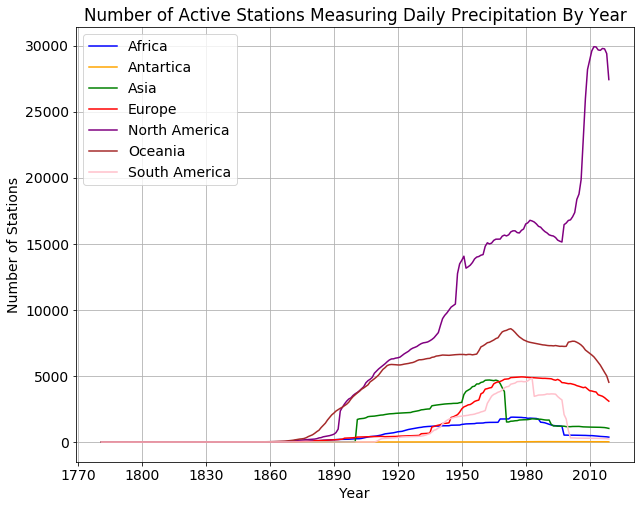

In [57]:
fig, ax = plot_station_counts(prcp_df,\
                    "Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Precipitation By Year",\
                    "prcp_by_year.png")

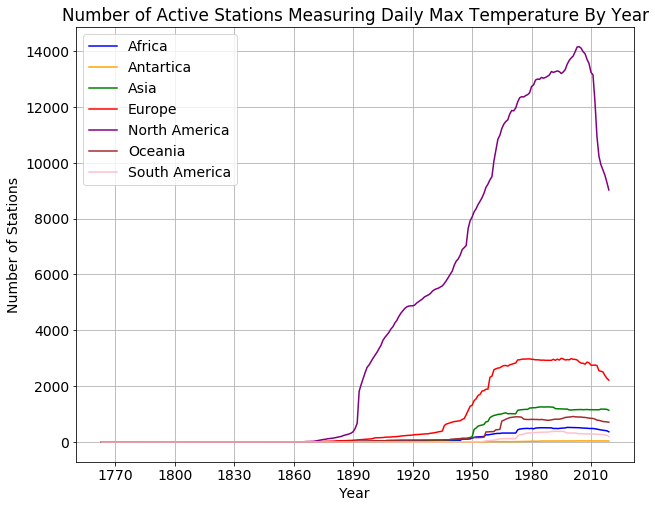

In [55]:
fig, ax = plot_station_counts(tmax_df,\
                    "Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Max Temperature By Year",\
                    "tmax_by_year.png")

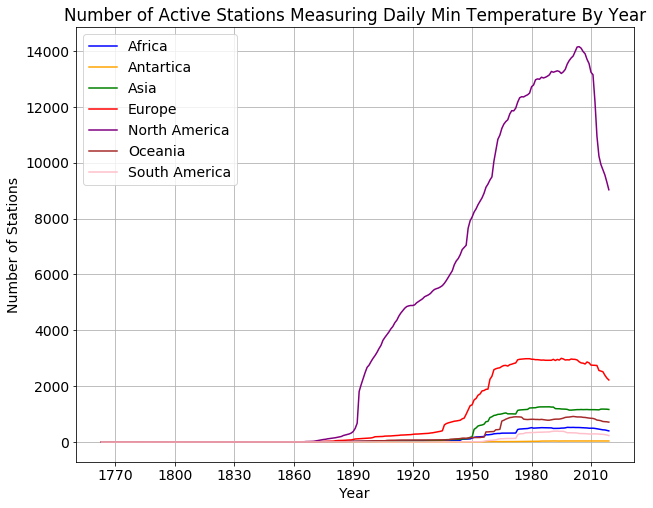

In [58]:
fig, ax = plot_station_counts(tmin_df,\
                    "Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Min Temperature By Year",\
                    "tmin_by_year.png")

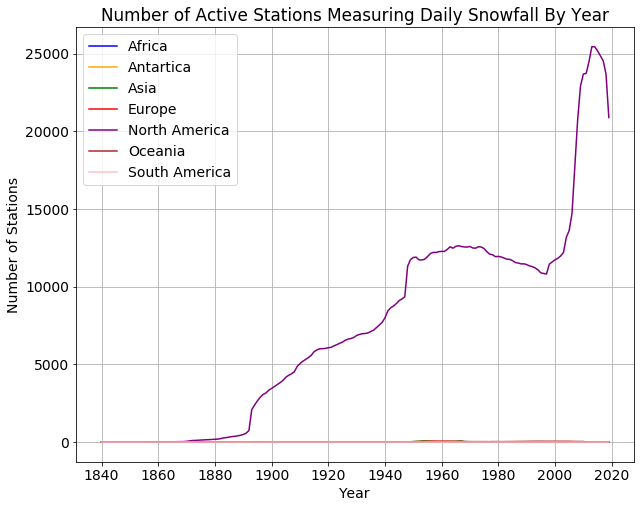

In [59]:
fig, ax = plot_station_counts(snow_df,\
                    "Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Snowfall By Year",\
                    "snow_by_year.png")

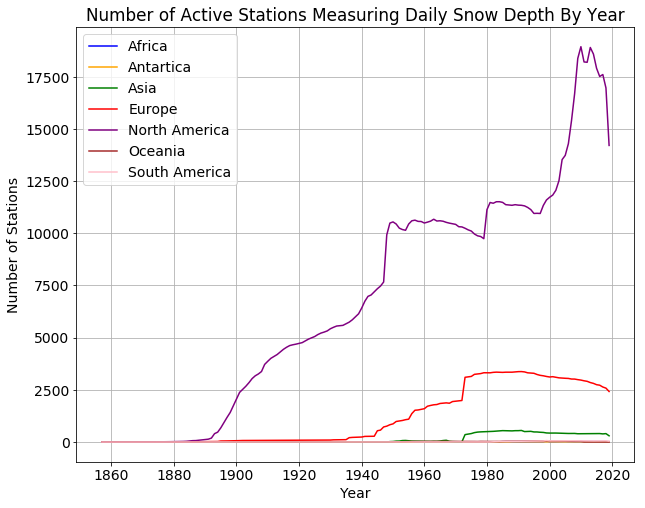

In [60]:
fig, ax = plot_station_counts(snwd_df,\
                    "Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Snow Depth By Year",\
                    "snwd_by_year.png")

In [93]:
def plot_all_station_counts (min_year, prcp, tmin, tmax, snow, snwd, continents, colors, filename, img_path=IMG_PATH):
    """ Plot a line plot for the number of active stations each year for each continent:
    
    Args:
        continents: a list of continent names to be used in the plot.
        colors: a dict of the form {"continent" : "color"} for plotting
        filename: a file for saving the figure
    
    Returns:
        the return values of the plt.subplots() function
    """
    if not os.path.isdir(img_path):
        os.makedirs(img_path)

    fig, axes = plt.subplots(3, 2, figsize=(20, 12), sharey='all', sharex='all')
    plt.rcParams.update({'font.size': 14})

    tmin_df = tmin.query(f'year >= {min_year}')
    tmax_df = tmax.query(f'year >= {min_year}')
    snow_df = snow.query(f'year >= {min_year}')
    snwd_df = snwd.query(f'year >= {min_year}')
    prcp_df = prcp.query(f'year >= {min_year}')
    
    # First tmin
    ax = axes[1,0]
    handles=[]
    for continent in continents:
        counts = tmin_df[continent]
        
        x_axis = tmin_df.year
        ax.plot(x_axis, counts,\
                       #linestyle="--", linewidth=0.5,\
                       color=colors[continent],\
                       #alpha=0.7,\
                       label=continent)
        
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Stations")
    ax.set_title("Daily Min Temperature")
    ax.grid(which='major')
    ax.legend()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    #plt.legend(loc="best", fontsize="medium", fancybox=True)

    # Next tmax
    ax = axes[1,1]
    for continent in continents:
        counts = tmax_df[continent]
        
        x_axis = tmax_df.year
        ax.plot(x_axis, counts,\
                       #linestyle="--", linewidth=0.5,\
                       color=colors[continent],\
                       #alpha=0.7,\
                       label=continent)
    
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Stations")
    ax.set_title("Daily Max Temperature")
    ax.grid(which='major')
    #ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.legend()
    
    # Next prcp
    ax = axes[0,0]
    for continent in continents:
        counts = prcp_df[continent]
        
        x_axis = prcp_df.year
        ax.plot(x_axis, counts,\
                       #linestyle="--", linewidth=0.5,\
                       color=colors[continent],\
                       #alpha=0.7,\
                       label=continent)
        
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Stations")
    ax.set_title("Daily Precipitation")
    ax.grid(which='major')
    ax.legend()
    #ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    #plt.legend(loc="best", fontsize="medium", fancybox=True)
    
    # Next snow
    ax = axes[2,0]
    for continent in continents:
        counts = snow_df[continent]
        
        x_axis = snow_df.year
        ax.plot(x_axis, counts,\
                       #linestyle="--", linewidth=0.5,\
                       color=colors[continent],\
                       #alpha=0.7,\
                       label=continent)
        
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Stations")
    ax.set_title("Daily Snowfall")
    ax.grid(which='major')
    #ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    #plt.legend(loc="best", fontsize="medium", fancybox=True)
    ax.legend()
    
    # Next snwd
    ax = axes[2,1]
    for continent in continents:
        counts = snwd_df[continent]
        
        x_axis = snwd_df.year
        ax.plot(x_axis, counts,\
                       #linestyle="--", linewidth=0.5,\
                       color=colors[continent],\
                       #alpha=0.7,\
                       label=continent)
        
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Stations")
    ax.set_title("Daily Snow Depth")
    ax.grid(which='major')
    #ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    #plt.legend(loc="best", fontsize="medium", fancybox=True)
    ax.legend()
    
    fig.delaxes(axes[0,1])
    plt.tight_layout()
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax

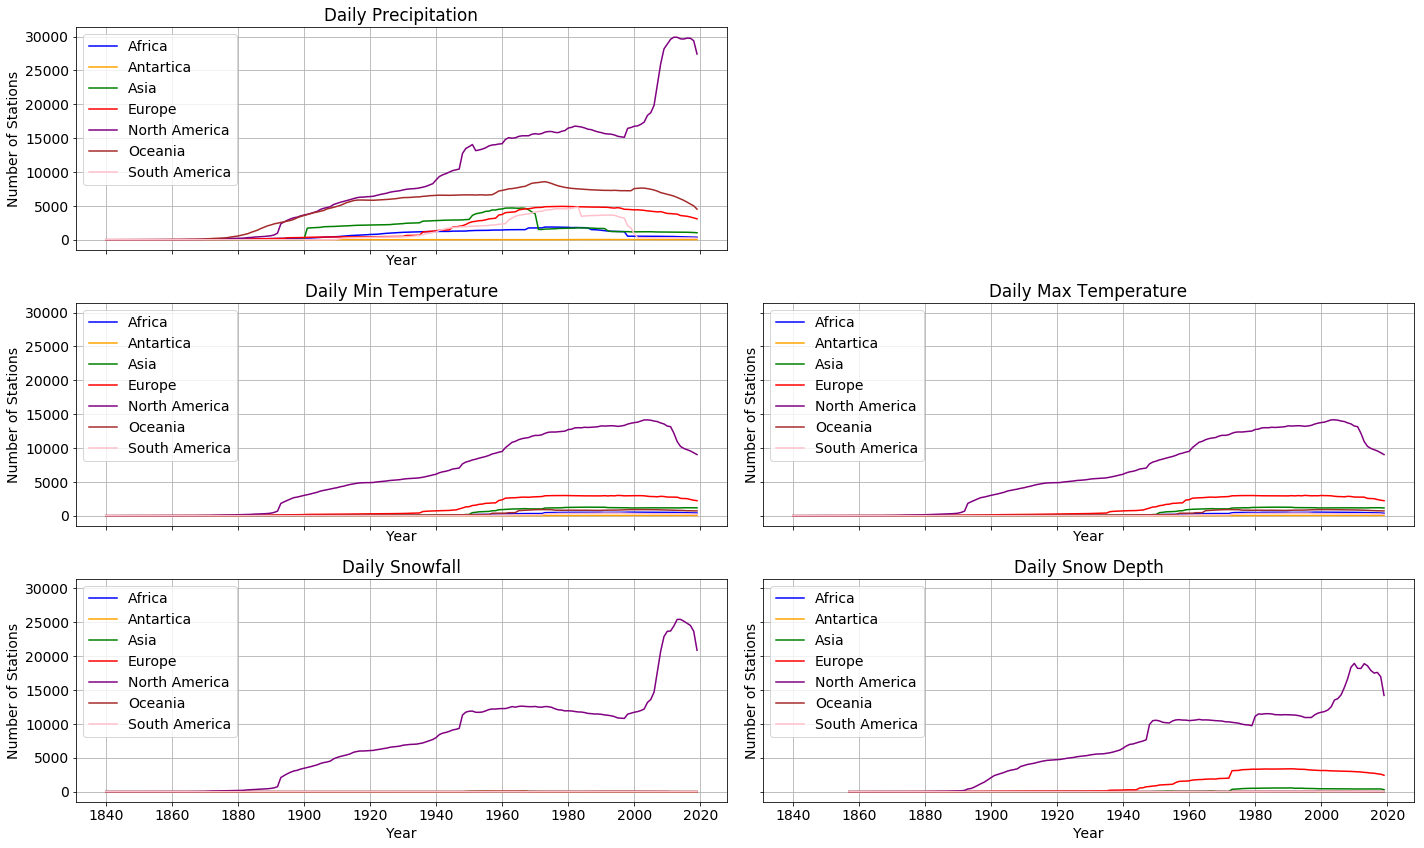

In [94]:
f, ax = plot_all_station_counts(1840, prcp_df, tmin_df, tmax_df, snow_df, snwd_df,\
                        ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                        {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                         "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                        "test")

# Identify the Years with the Largest Change in Numbers of Stations

In [108]:
# Which year saw the greatest increase in North America?
(prcp_df['North America'].shift(-1) - prcp_df['North America'][:-1]).idxmax()

225

In [109]:
prcp_df.iloc[[224,225,226],:]

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
224,511,28,1182,4219,18761,7457,295,5,2005
225,504,26,1162,4162,19857,7340,292,5,2006
226,503,26,1147,4113,22937,7182,292,5,2007


In [ ]:
# We can do this with a helper function:

In [113]:
def largest_absolute_changes(df):
    columns = df.columns
    year = df.year
    
    results = []
    
    for column in columns:
        if column != 'year':
            result_dict = {}
            ser0 = df[column][:-1] # take all values up until the last year
            serm1 = df[column].shift(-1)
            delta = serm1 - ser0
            increase = delta.idxmax()
            decrease = delta.idxmin()
            result_dict['continent'] = column
            result_dict['largest increase'] = delta[increase]
            result_dict['largest decrease'] = -delta[decrease] # report a decrease as positive number
            # We give the span of years for largest increase/decrease
            result_dict['largest increase interval'] = [year[increase], year[increase+1]]
            result_dict['largest decrease interval'] = [year[decrease], year[decrease+1]]
            results.append(result_dict)
            
    return pd.DataFrame(results)

In [114]:
largest_absolute_changes(prcp_df)

,continent,largest decrease,largest decrease interval,largest increase,largest increase interval
0,Africa,666.0,"[1997, 1998]",251.0,"[1967, 1968]"
1,Antartica,4.0,"[2002, 2003]",11.0,"[1972, 1973]"
2,Asia,2299.0,"[1970, 1971]",1680.0,"[1900, 1901]"
3,Europe,211.0,"[2013, 2014]",474.0,"[1935, 1936]"
4,North America,1967.0,"[2018, 2019]",3080.0,"[2006, 2007]"
5,Oceania,484.0,"[2018, 2019]",313.0,"[1999, 2000]"
6,South America,1362.0,"[1983, 1984]",543.0,"[1961, 1962]"
7,Unknown,2.0,"[1962, 1963]",2.0,"[1948, 1949]"


In [115]:
largest_absolute_changes(snow_df)

,continent,largest decrease,largest decrease interval,largest increase,largest increase interval
0,Africa,3.0,"[1963, 1964]",4.0,"[1950, 1951]"
1,Antartica,2.0,"[1962, 1963]",6.0,"[1956, 1957]"
2,Asia,36.0,"[1967, 1968]",20.0,"[1952, 1953]"
3,Europe,34.0,"[1967, 1968]",19.0,"[1948, 1949]"
4,North America,2806.0,"[2018, 2019]",3072.0,"[2006, 2007]"
5,Oceania,26.0,"[2010, 2011]",11.0,"[1944, 1945]"
6,South America,1.0,"[1945, 1946]",2.0,"[1944, 1945]"
7,Unknown,2.0,"[1957, 1958]",2.0,"[1948, 1949]"


In [117]:
largest_absolute_changes(tmin_df)

,continent,largest decrease,largest decrease interval,largest increase,largest increase interval
0,Africa,19.0,"[1990, 1991]",128.0,"[1972, 1973]"
1,Antartica,2.0,"[1962, 1963]",8.0,"[1956, 1957]"
2,Asia,56.0,"[1991, 1992]",272.0,"[1950, 1951]"
3,Europe,177.0,"[2013, 2014]",352.0,"[1958, 1959]"
4,North America,1238.0,"[2012, 2013]",1137.0,"[1892, 1893]"
5,Oceania,69.0,"[1975, 1976]",296.0,"[1964, 1965]"
6,South America,29.0,"[1997, 1998]",127.0,"[1972, 1973]"
7,Unknown,2.0,"[1962, 1963]",2.0,"[1948, 1949]"


In [118]:
largest_absolute_changes(tmax_df)

,continent,largest decrease,largest decrease interval,largest increase,largest increase interval
0,Africa,37.0,"[2018, 2019]",114.0,"[1972, 1973]"
1,Antartica,3.0,"[1963, 1964]",8.0,"[1956, 1957]"
2,Asia,54.0,"[1991, 1992]",273.0,"[1950, 1951]"
3,Europe,183.0,"[2013, 2014]",422.0,"[1958, 1959]"
4,North America,1239.0,"[2012, 2013]",1147.0,"[1892, 1893]"
5,Oceania,66.0,"[1975, 1976]",297.0,"[1964, 1965]"
6,South America,43.0,"[2018, 2019]",91.0,"[1972, 1973]"
7,Unknown,2.0,"[1962, 1963]",2.0,"[1948, 1949]"


In [119]:
largest_absolute_changes(snwd_df)

,continent,largest decrease,largest decrease interval,largest increase,largest increase interval
0,Africa,27.0,"[1999, 2000]",26.0,"[1998, 1999]"
1,Antartica,2.0,"[1966, 1967]",8.0,"[1987, 1988]"
2,Asia,104.0,"[2018, 2019]",345.0,"[1972, 1973]"
3,Europe,161.0,"[2018, 2019]",1111.0,"[1972, 1973]"
4,North America,2754.0,"[2018, 2019]",2259.0,"[1947, 1948]"
5,Oceania,26.0,"[2010, 2011]",9.0,"[1948, 1949]"
6,South America,14.0,"[2018, 2019]",18.0,"[1998, 1999]"
7,Unknown,2.0,"[1957, 1958]",3.0,"[1948, 1949]"


# Look at the Dropout of Stations Over Time

In [123]:
def count_stations_by_lastyear(inventory, element):
    # range of years
    min_year = inventory[inventory['element'] == element].first_year.min()
    max_year = inventory[inventory['element'] == element].last_year.max()
    sub_inventory = inventory[inventory['element'] == element]
    
    results_list = []
    # Not the most efficient but it works
    # Note - we exclue the most recent year since these stations are still active
    for year in range(min_year, max_year):
        results_dict = {'year': year, 'Africa': 0, 'Antartica': 0, 
                        'Asia': 0, 'Europe': 0, 'North America': 0, 'Oceania': 0,'South America': 0,'Unknown': 0}
        
        for row in sub_inventory.itertuples():
            if (year == row.last_year):
                # station's last_year was the given year:
                station = row.station_id
                station_country = station[:2]
                if station_country in continent_map:
                    station_continent_code = continent_map[station_country]
                    station_continent = continent_name_map[station_continent_code]
                else:
                    # Will this ever happen?
                    station_continent = 'Unknown'
                results_dict[station_continent] += 1
                
        results_list.append(results_dict)
        
    return pd.DataFrame(results_list)


In [124]:
prcp_lastyear = count_stations_by_lastyear(inventory_stations, 'PRCP')
prcp_lastyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
233,18,2,7,56,2089,207,6,0,2014
234,9,0,9,69,2010,278,7,1,2015
235,6,1,11,107,2102,269,9,1,2016
236,17,0,27,140,2358,265,4,0,2017
237,21,4,36,127,2412,484,21,0,2018


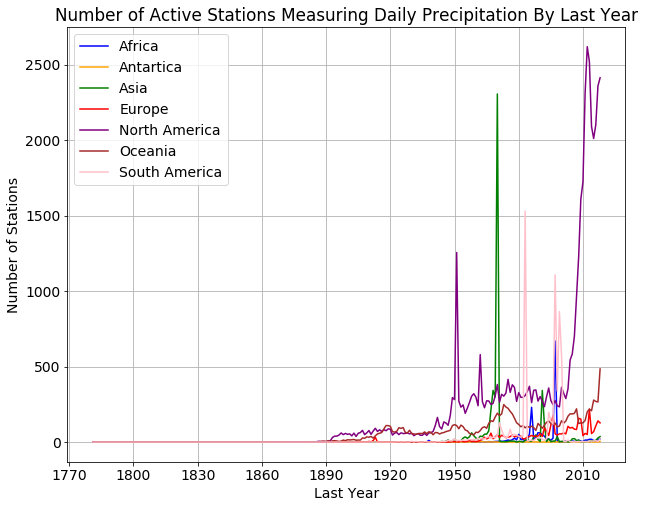

In [125]:
fig, ax = plot_station_counts(prcp_lastyear,\
                    "Last Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Precipitation By Last Year",\
                    "prcp_by_lastyear.png")

In [126]:
tmax_lastyear = count_stations_by_lastyear(inventory_stations, 'TMAX')
tmax_lastyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
251,12,0,6,27,329,17,5,0,2014
252,10,0,2,35,223,27,5,0,2015
253,7,1,6,129,225,6,16,0,2016
254,15,1,12,102,283,5,10,0,2017
255,37,3,38,69,283,14,43,0,2018


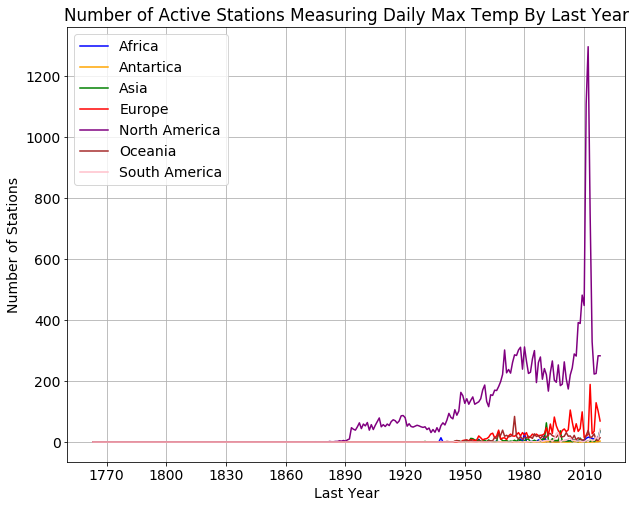

In [127]:
fig, ax = plot_station_counts(tmax_lastyear,\
                    "Last Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Max Temp By Last Year",\
                    "tmax_by_lastyear.png")

In [128]:
tmin_lastyear = count_stations_by_lastyear(inventory_stations, 'TMIN')
tmin_lastyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
251,14,1,5,24,327,15,4,0,2014
252,13,0,2,39,220,28,2,0,2015
253,4,1,7,129,227,5,16,0,2016
254,18,1,5,101,280,6,10,0,2017
255,16,0,12,69,281,12,24,0,2018


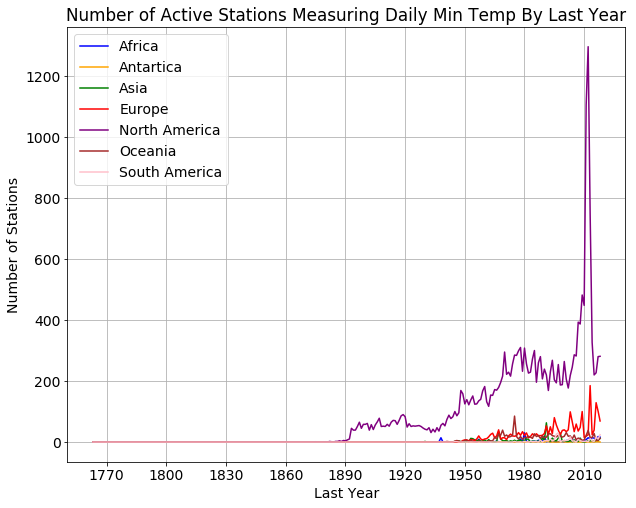

In [129]:
fig, ax = plot_station_counts(tmin_lastyear,\
                    "Last Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Min Temp By Last Year",\
                    "tmin_by_lastyear.png")

In [130]:
snow_lastyear = count_stations_by_lastyear(inventory_stations, 'SNOW')
snow_lastyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
174,0,0,0,0,2228,0,0,0,2014
175,0,0,0,0,2344,0,0,0,2015
176,0,0,0,0,2335,0,0,0,2016
177,0,0,0,0,2720,0,0,0,2017
178,0,0,0,0,3300,1,0,0,2018


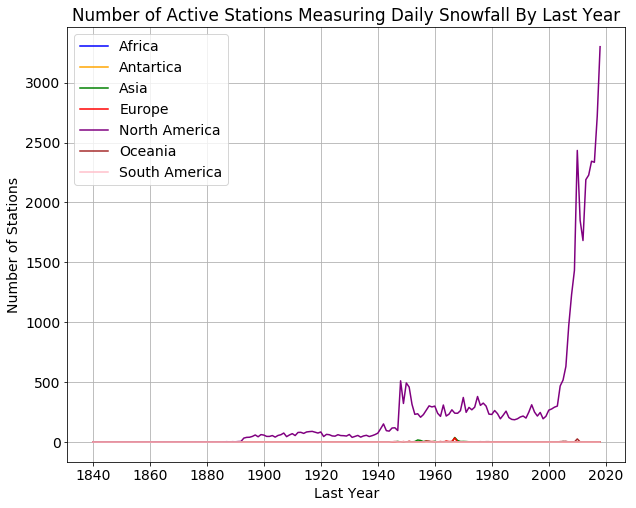

In [131]:
fig, ax = plot_station_counts(snow_lastyear,\
                    "Last Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Snowfall By Last Year",\
                    "snow_by_lastyear.png")

In [132]:
snwd_lastyear = count_stations_by_lastyear(inventory_stations, 'SNWD')
snwd_lastyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
157,2,1,11,64,1905,0,0,0,2014
158,4,0,9,38,1672,0,2,0,2015
159,1,0,23,91,1419,0,0,0,2016
160,3,1,15,61,2147,0,1,0,2017
161,2,0,105,161,3246,1,14,0,2018


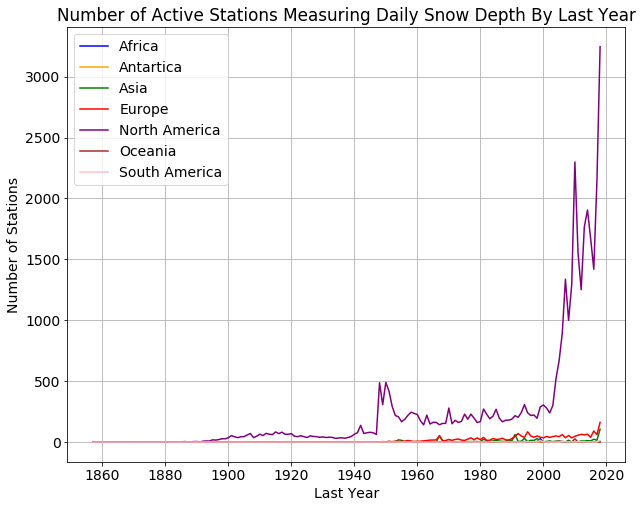

In [133]:
fig, ax = plot_station_counts(snwd_lastyear,\
                    "Last Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Snow Depth By Last Year",\
                    "snwd_by_lastyear.png")

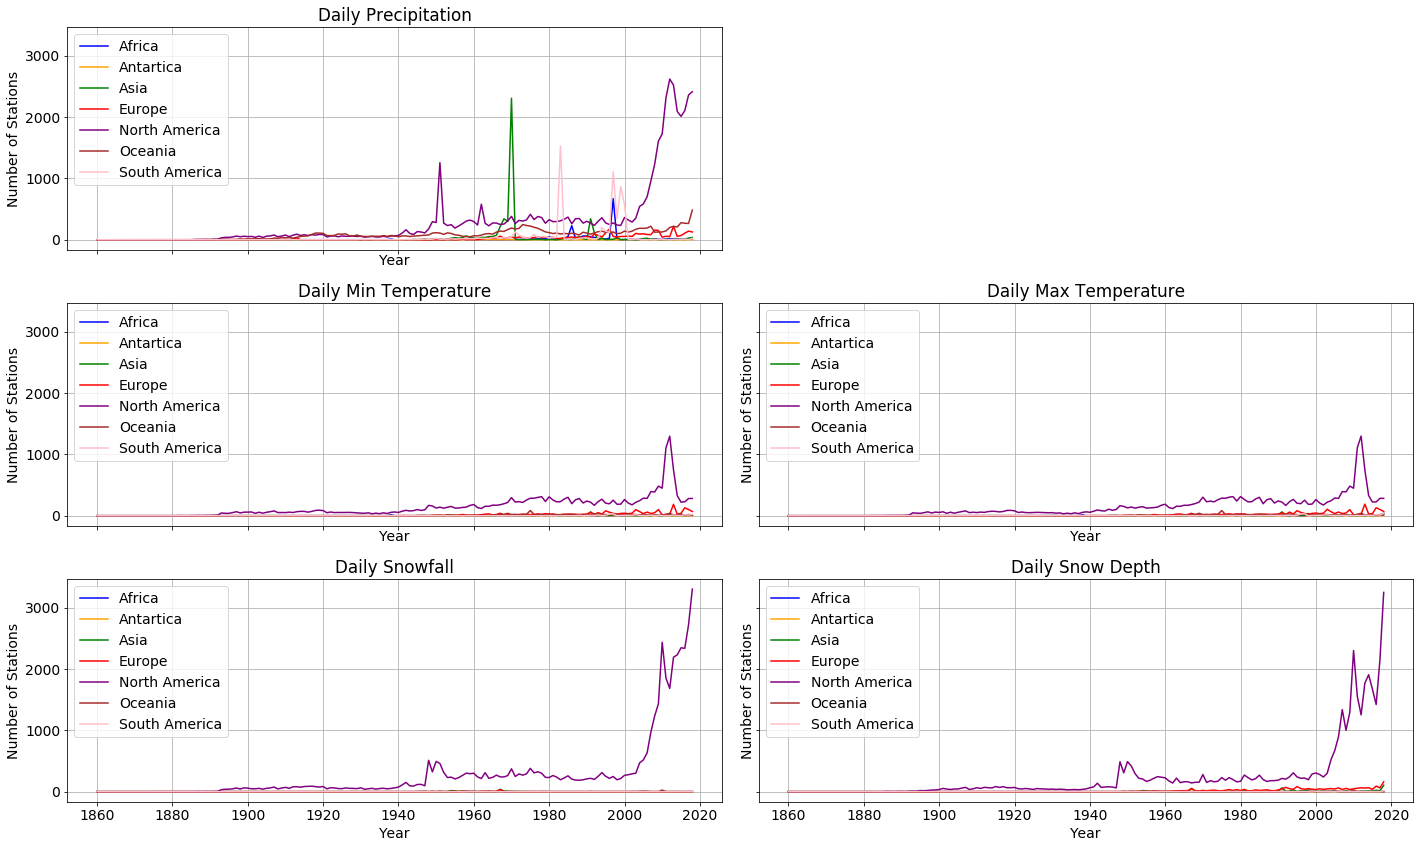

In [134]:
# Plot with uniform axes
f, ax = plot_all_station_counts(1860, prcp_lastyear, tmin_lastyear, tmax_lastyear, snow_lastyear, snwd_lastyear,\
                        ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                        {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                         "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                        "test_lastyear")

# Consider the Addition of Stations to the Network Over Time

In [137]:
def count_stations_by_firstyear(inventory, element):
    # range of years
    min_year = inventory[inventory['element'] == element].first_year.min()
    max_year = inventory[inventory['element'] == element].last_year.max()
    sub_inventory = inventory[inventory['element'] == element]
    
    results_list = []
    # Not the most efficient but it works
    # Note - we include the last year since stations are being added 
    for year in range(min_year, max_year+1):
        results_dict = {'year': year, 'Africa': 0, 'Antartica': 0, 
                        'Asia': 0, 'Europe': 0, 'North America': 0, 'Oceania': 0,'South America': 0,'Unknown': 0}
        
        for row in sub_inventory.itertuples():
            if (year == row.first_year):
                # station's first_year was the given year:
                station = row.station_id
                station_country = station[:2]
                if station_country in continent_map:
                    station_continent_code = continent_map[station_country]
                    station_continent = continent_name_map[station_continent_code]
                else:
                    # Will this ever happen?
                    station_continent = 'Unknown'
                results_dict[station_continent] += 1
                
        results_list.append(results_dict)
        
    return pd.DataFrame(results_list)


In [138]:
prcp_firstyear = count_stations_by_firstyear(inventory_stations, 'PRCP')
prcp_firstyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
234,0,0,0,2,2057,0,0,0,2015
235,0,0,0,11,2154,0,0,0,2016
236,0,0,0,1,2071,0,0,0,2017
237,0,0,0,0,2000,0,0,0,2018
238,0,0,0,0,445,0,0,0,2019


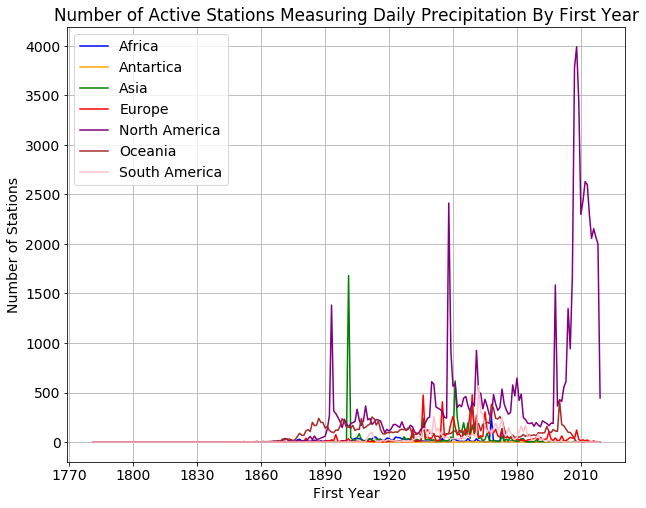

In [139]:
fig, ax = plot_station_counts(prcp_firstyear,\
                    "First Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Precipitation By First Year",\
                    "prcp_by_firstyear.png")

In [140]:
tmin_firstyear = count_stations_by_firstyear(inventory_stations, 'TMIN')
tmin_firstyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
252,0,0,31,3,26,0,0,0,2015
253,0,0,3,14,30,1,0,0,2016
254,0,0,4,4,44,0,2,0,2017
255,0,0,4,0,24,0,0,0,2018
256,0,0,3,0,7,0,0,0,2019


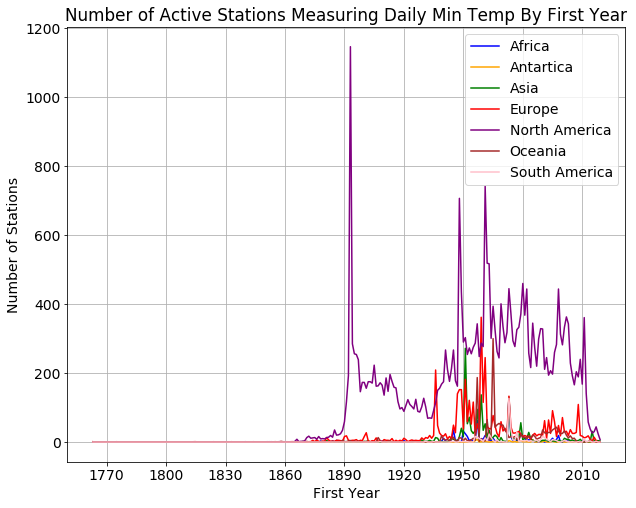

In [141]:
fig, ax = plot_station_counts(tmin_firstyear,\
                    "First Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Min Temp By First Year",\
                    "tmin_by_firstyear.png")

In [142]:
tmax_firstyear = count_stations_by_firstyear(inventory_stations, 'TMAX')
tmax_firstyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
252,0,0,31,3,26,1,0,0,2015
253,0,0,3,14,32,1,0,0,2016
254,0,0,4,4,44,0,0,0,2017
255,1,0,4,0,26,0,0,0,2018
256,0,0,3,0,7,0,0,0,2019


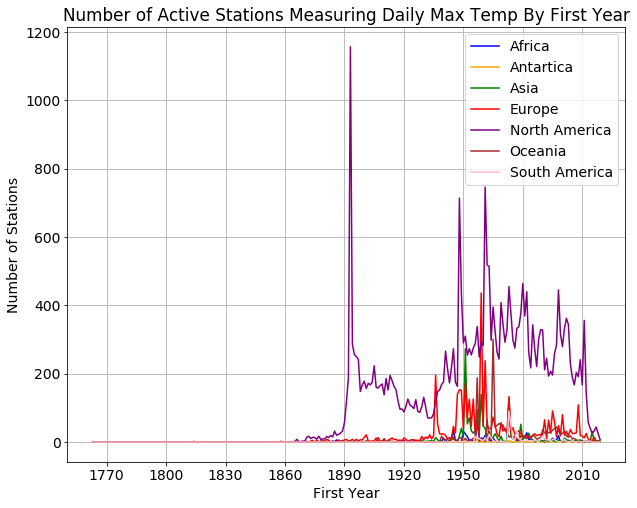

In [143]:
fig, ax = plot_station_counts(tmax_firstyear,\
                    "First Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Max Temp By First Year",\
                    "tmax_by_firstyear.png")

In [144]:
snow_firstyear = count_stations_by_firstyear(inventory_stations, 'SNOW')
snow_firstyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
175,0,0,0,0,1963,0,0,0,2015
176,0,0,0,0,2027,0,0,0,2016
177,0,0,0,0,2017,0,0,0,2017
178,0,0,0,0,1865,0,0,0,2018
179,0,0,0,0,494,0,0,0,2019


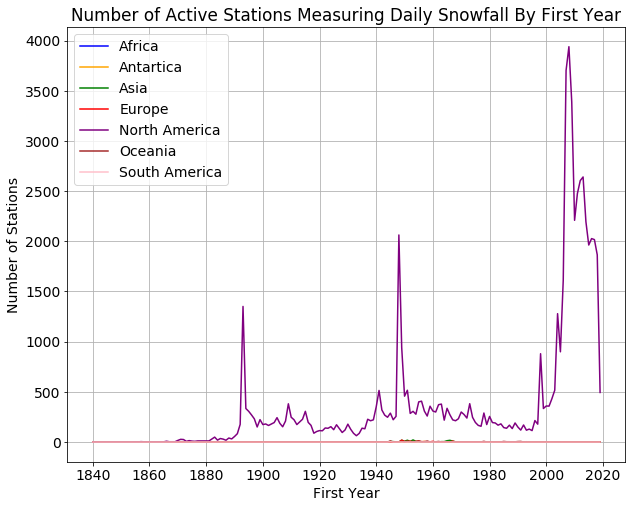

In [145]:
fig, ax = plot_station_counts(snow_firstyear,\
                    "First Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Snowfall By First Year",\
                    "snow_by_firstyear.png")

In [146]:
snwd_firstyear = count_stations_by_firstyear(inventory_stations, 'SNWD')
snwd_firstyear.tail()

,Africa,Antartica,Asia,Europe,North America,Oceania,South America,Unknown,year
158,2,1,17,1,1225,0,1,0,2015
159,0,0,9,14,1277,0,0,0,2016
160,1,0,7,4,1513,0,0,0,2017
161,0,0,28,7,1505,0,6,0,2018
162,0,1,1,0,492,0,0,0,2019


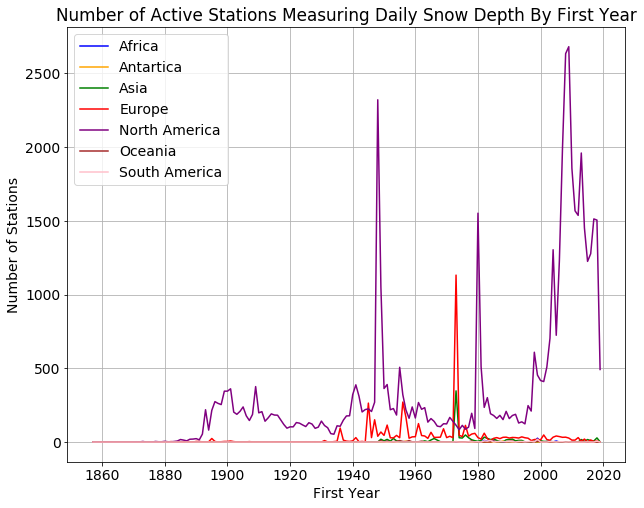

In [147]:
fig, ax = plot_station_counts(snwd_firstyear,\
                    "First Year", "Number of Stations",\
                    ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                    {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                    "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                    "Number of Active Stations Measuring Daily Snow Depth By First Year",\
                    "snwd_by_firstyear.png")

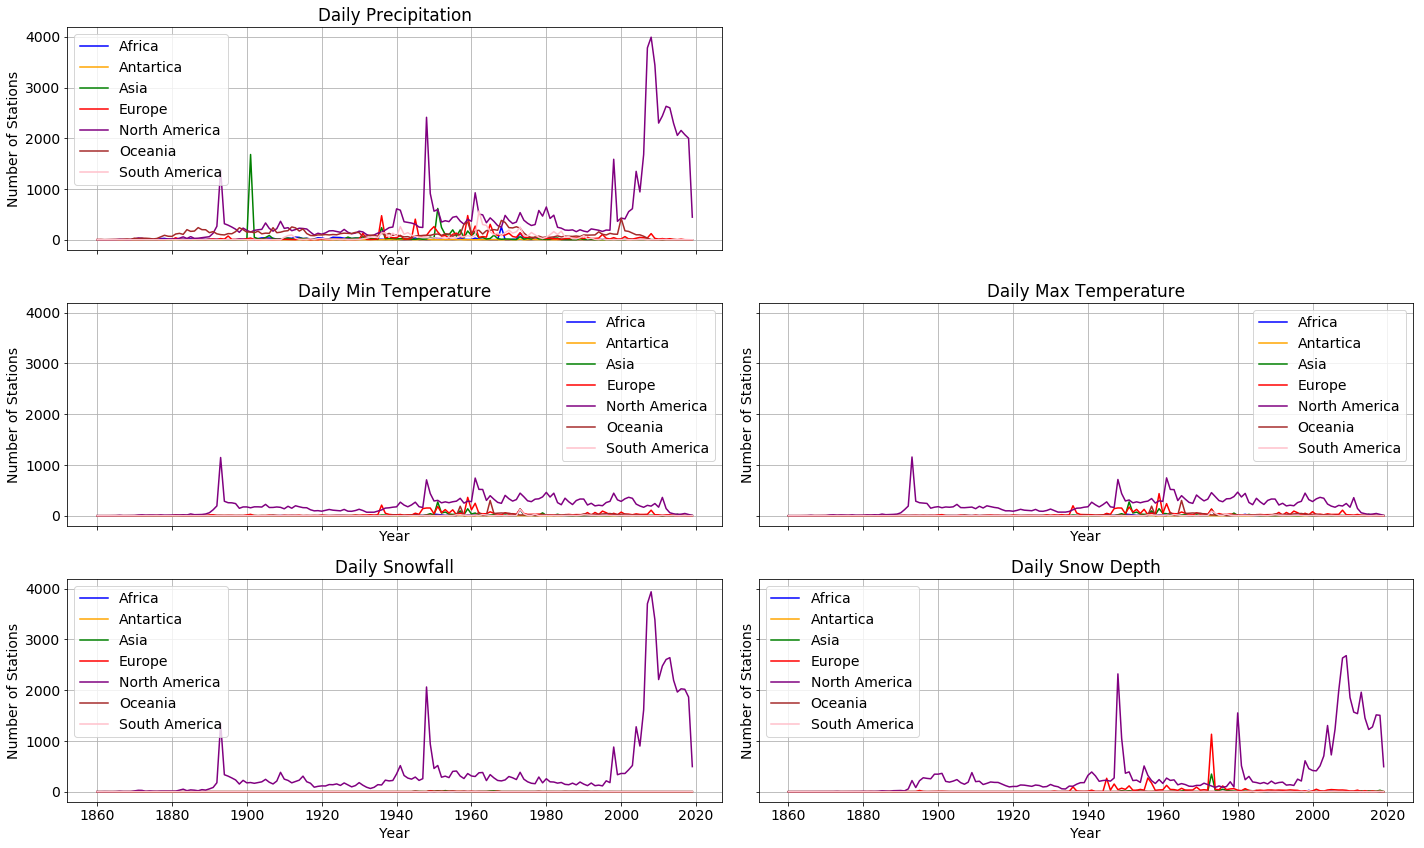

In [148]:
# Plot with uniform axes
f, ax = plot_all_station_counts(1860, prcp_firstyear, tmin_firstyear, tmax_firstyear, snow_firstyear, snwd_firstyear,\
                        ['Africa', 'Antartica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],\
                        {"Africa" : "blue", "Antartica" : "orange", "Asia" : "green", "Europe" : "red",\
                         "North America": "purple", "Oceania": "brown", "South America": "pink"},\
                        "test_firstyear")

# Consider the Number of Years of Data by Measurement Type and Continent

In [167]:
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

def plot_years_of_data(df, element, filename, img_path=IMG_PATH):
    sub_df = df[df['element'] == element]
    
    fig, ax = plt.subplots(figsize=(10,8))

    sns.violinplot(ax=ax, x='continent', y='years', data=sub_df, inner="quart")
    sns.despine(left=True)
    ax.set_xlabel("Continent")
    ax.set_ylabel("Years")
    #ax.set_title("")
    
    output_file = os.path.join(img_path, filename)
    fig.savefig(output_file)
    plt.show()

    return fig, ax


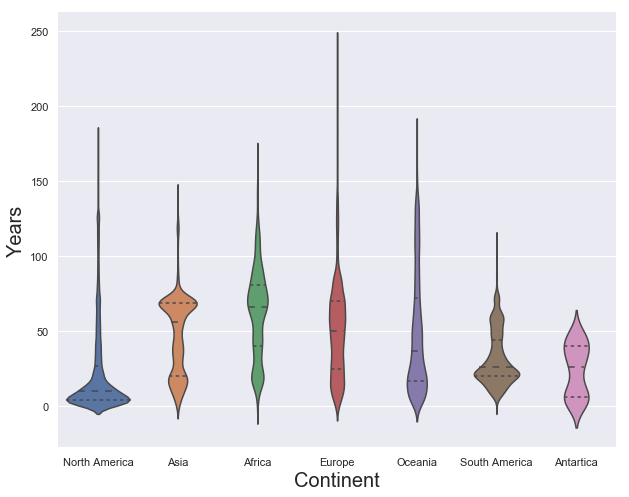

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2f222a2e4a8>)

In [168]:
plot_years_of_data(inventory_stations, 'PRCP', 'prcp_years')

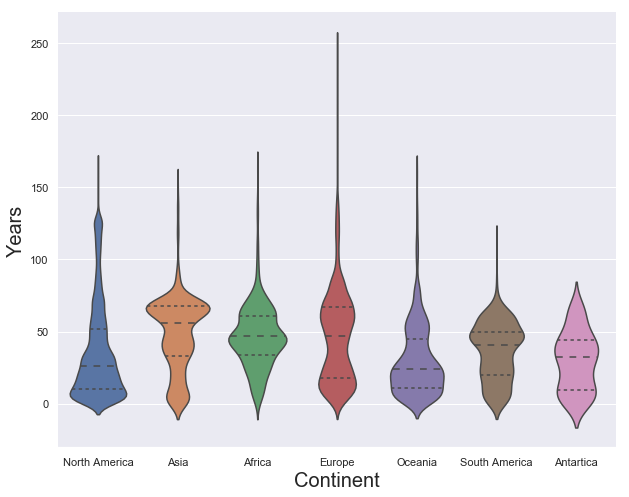

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2f21fc2a9e8>)

In [169]:
plot_years_of_data(inventory_stations, 'TMIN', 'tmin_years')

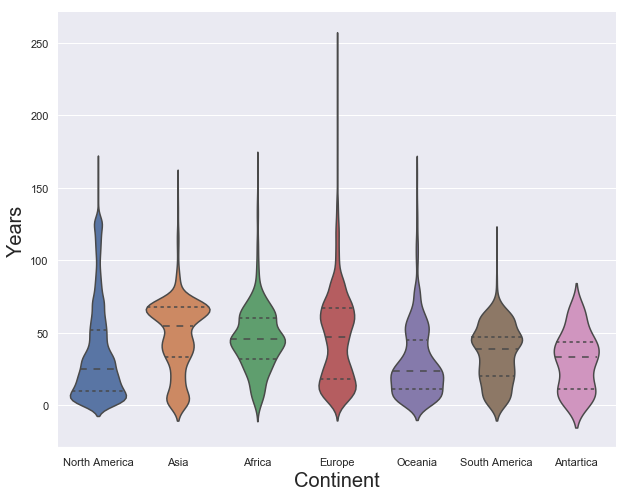

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2f22260c240>)

In [170]:
plot_years_of_data(inventory_stations, 'TMAX', 'tmax_years')

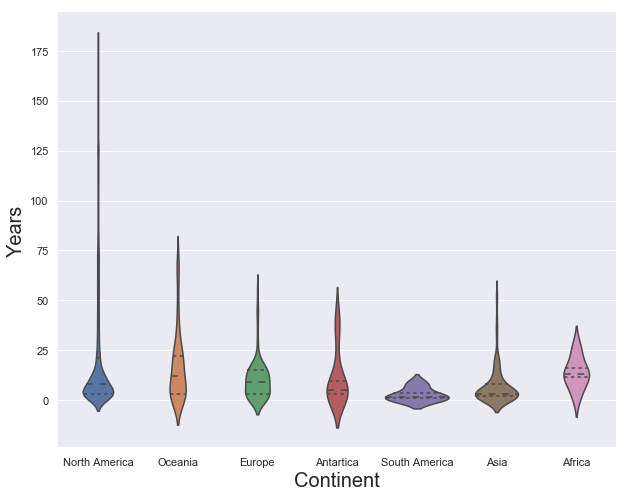

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2f222615550>)

In [171]:
plot_years_of_data(inventory_stations, 'SNOW', 'snow_years')

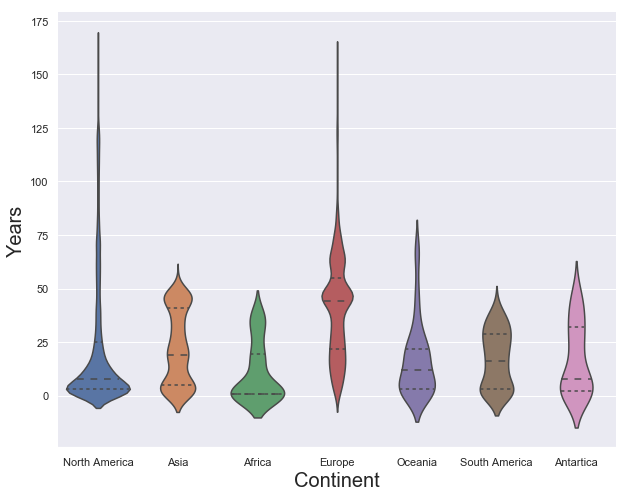

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2f223d71550>)

In [172]:
plot_years_of_data(inventory_stations, 'SNWD', 'snwd_years')

In [189]:
# Look at summary statistics for first_year and years by continent
summary_df = inventory_stations[['first_year', 'years', 'element', 'continent']].groupby(['element', 'continent']).agg(['count', 'min', 'mean', 'median', 'max']).loc[['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD']]

In [195]:
summary_df.to_csv(os.path.join(DESTINATION_PATH, "summary-stats.csv"))

In [196]:
summary_df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr>\n      <th></th>\n      <th></th>\n      <th colspan="5" halign="left">first_year</th>\n      <th colspan="5" halign="left">years</th>\n    </tr>\n    <tr>\n      <th></th>\n      <th></th>\n      <th>count</th>\n      <th>min</th>\n      <th>mean</th>\n      <th>median</th>\n      <th>max</th>\n      <th>count</th>\n      <th>min</th>\n      <th>mean</th>\n      <th>median</th>\n      <th>max</th>\n    </tr>\n    <tr>\n      <th>element</th>\n      <th>continent</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th rowspan="7" valign="top">PRCP</th>\n      <th>Africa</th>\n      <td>2104</td>\n      <td>1850</td>\n      <td>1934.986692</td>\n      <td>1929.0</td>\n      <td>2012</td>\n      <td>2104</td>\n      <td>1</td>\n      <td>62.497624</td>\n     